In [1]:
%matplotlib inline
import nivapy3 as nivapy
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

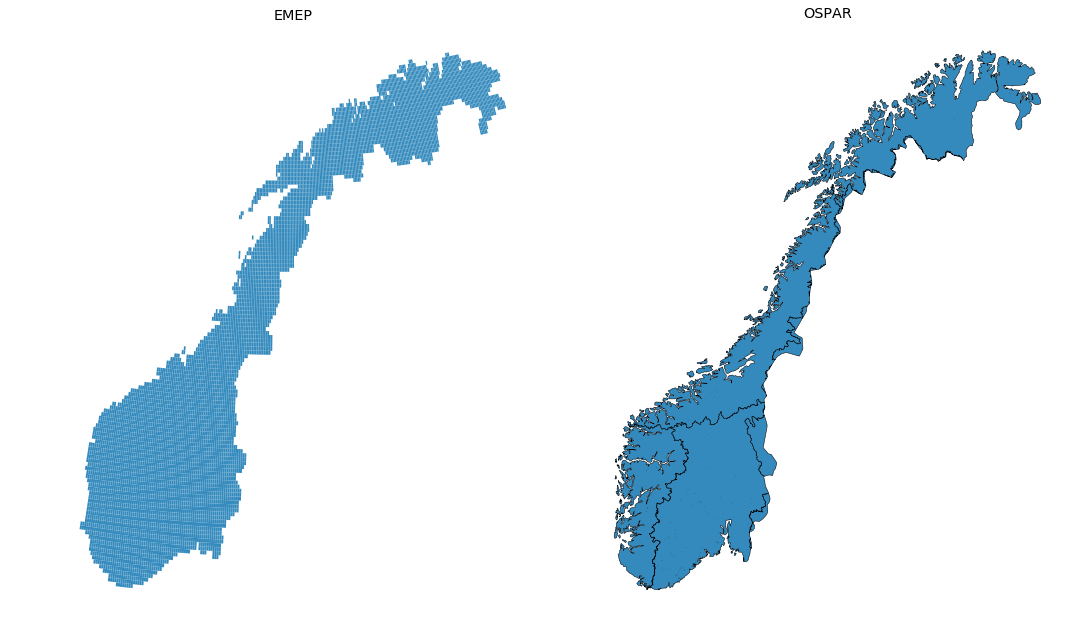

In [2]:
# Read data
emep_path = r'../data/gis/EMEP_GRID_01x01DEG_NO_minus_Svalbard.shp'
emep = gpd.read_file(emep_path)

osp_path = r'../data/gis/ospar_regions_clip_land.shp'
osp = gpd.read_file(osp_path)

# Convert EMEP to UTM Z33 to match osp
emep = emep.to_crs(osp.crs)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
axes[0].axis('off')
axes[1].axis('off')
emep.plot(ax=axes[0])
osp.plot(ax=axes[1], edgecolor='k')
axes[0].set_title('EMEP')
axes[1].set_title('OSPAR')
plt.tight_layout()

In [3]:
# Convert to CEA proj. for area calculations
emep = emep.to_crs({'proj':'cea'})
osp = osp.to_crs({'proj':'cea'})

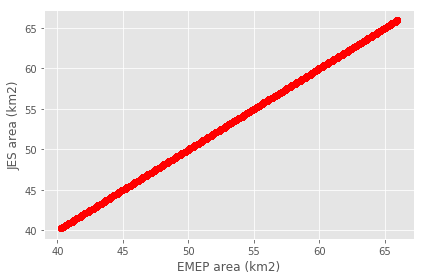

In [4]:
# Areas for EMEP
emep['area_jes'] = emep['geometry'].area/1E6

# Compare with areas stored in attribute table
plt.plot(emep['area'], emep['area_jes'], 'ro')
plt.xlabel('EMEP area (km2)')
plt.ylabel('JES area (km2)')
plt.tight_layout()

In [5]:
# Areas for OSPAR
osp['area_jes'] = osp['geometry'].area/1E6
osp

,ospar_regi,a_land_km2,a_tot_km2,geometry,area_jes
0,LOFOTEN-BARENTS SEA,108631,146720,(POLYGON ((1464629.765026862 5900331.090400354...,81735.555686
1,N/A,64295,64295,(POLYGON ((1274719.966411755 5447304.075911713...,14559.026068
2,NORTH SEA,47544,59725,(POLYGON ((632016.5042552906 5455450.986345577...,46092.518309
3,NORWEGIAN SEA2,83354,123094,(POLYGON ((564126.8349241215 5613879.890171177...,79111.043877
4,SKAGERAK,99541,103205,(POLYGON ((795019.5001233106 5392900.046024224...,97966.204322


In [6]:
# Dissolve OSPAR to whole of Norway
osp['ones'] = 1
nor = osp.dissolve(by='ones')

# Area
nor['area_jes'] = nor['geometry'].area/1E6

nor

,geometry,ospar_regi,a_land_km2,a_tot_km2,area_jes
ones,,,,,
1,(POLYGON ((537375.0078383102 5540026.962555452...,LOFOTEN-BARENTS SEA,108631,146720,319464.34801


In [7]:
# Intersect EMEP and OSPAR
emep_nor = nivapy.spatial.spatial_overlays(nor, emep)
emep_nor['area_jes'] = emep_nor['geometry'].area/1E6
emep_nor.sum()

ospar_regi    LOFOTEN-BARENTS SEALOFOTEN-BARENTS SEALOFOTEN-...
a_land_km2                                            780187842
a_tot_km2                                            1053743040
area_jes_1                                          2.29439e+09
long_min                                                 102662
long_max                                                 103381
lat_min                                                  464588
lat_max                                                  465306
long                                                     103022
lat                                                      464947
ISO           NONONONONONONONONONONONONONONONONONONONONONONO...
fraction                                                 6040.3
area                                                     380415
frac_area                                                323391
Name          NorwayNorwayNorwayNorwayNorwayNorwayNorwayNorw...
Number                                  

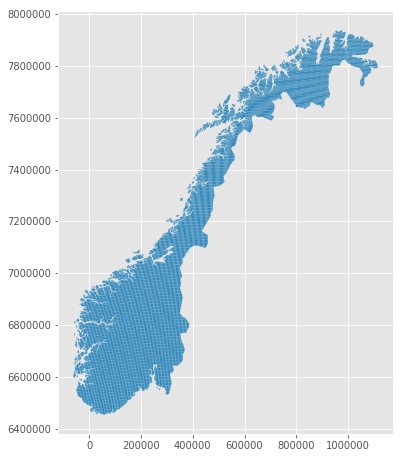

In [8]:
# Reproject and plot
emep_nor = emep_nor.to_crs({'init': 'epsg:32633'})
emep_nor.plot(figsize=(6,10))